### **Importing the Libraries**

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('/content/Covid_19.csv')

### **EDA**

In [169]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [170]:
df.shape

(49068, 10)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [172]:
# rename columns - Province/State, Country/Region
df.rename(columns={
    'Province/State' : 'State',
    'Country/Region' : 'Country'
}, inplace = True)

In [173]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [174]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [175]:
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [176]:
# Confirmed, Deaths,	Recovered cases with respect to country
df_total = df.groupby(['Country'])[['Confirmed', 'Deaths','Recovered']].sum().reset_index()

In [177]:
df_total

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1936390,49098,798240
1,Albania,196702,5708,118877
2,Algeria,1179755,77972,755897
3,Andorra,94404,5423,69074
4,Angola,22662,1078,6573
...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124
183,Western Sahara,901,63,648
184,Yemen,67180,17707,23779
185,Zambia,129421,2643,83611


In [178]:
# Confirmed, Deaths,	Recovered cases with respect to Date
df_dates = df.groupby(['Date'])[['Confirmed', 'Deaths','Recovered']].sum().reset_index()

In [179]:
df_dates

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
...,...,...,...,...
183,2020-07-23,15510481,633506,8710969
184,2020-07-24,15791645,639650,8939705
185,2020-07-25,16047190,644517,9158743
186,2020-07-26,16251796,648621,9293464


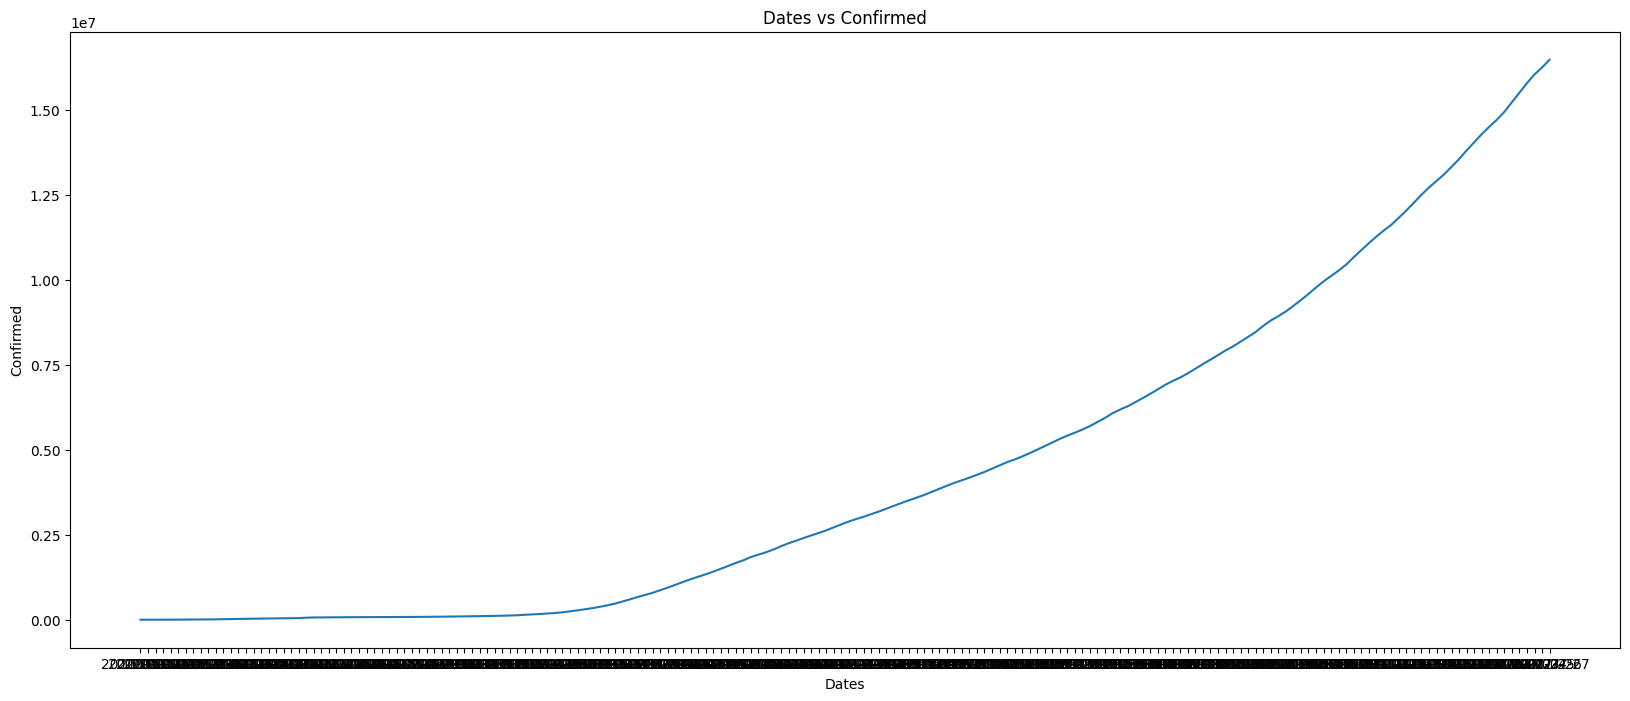

In [180]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_dates,x='Date',y='Confirmed')
plt.xlabel('Dates')
plt.ylabel('Confirmed')
plt.title('Dates vs Confirmed')
plt.show()

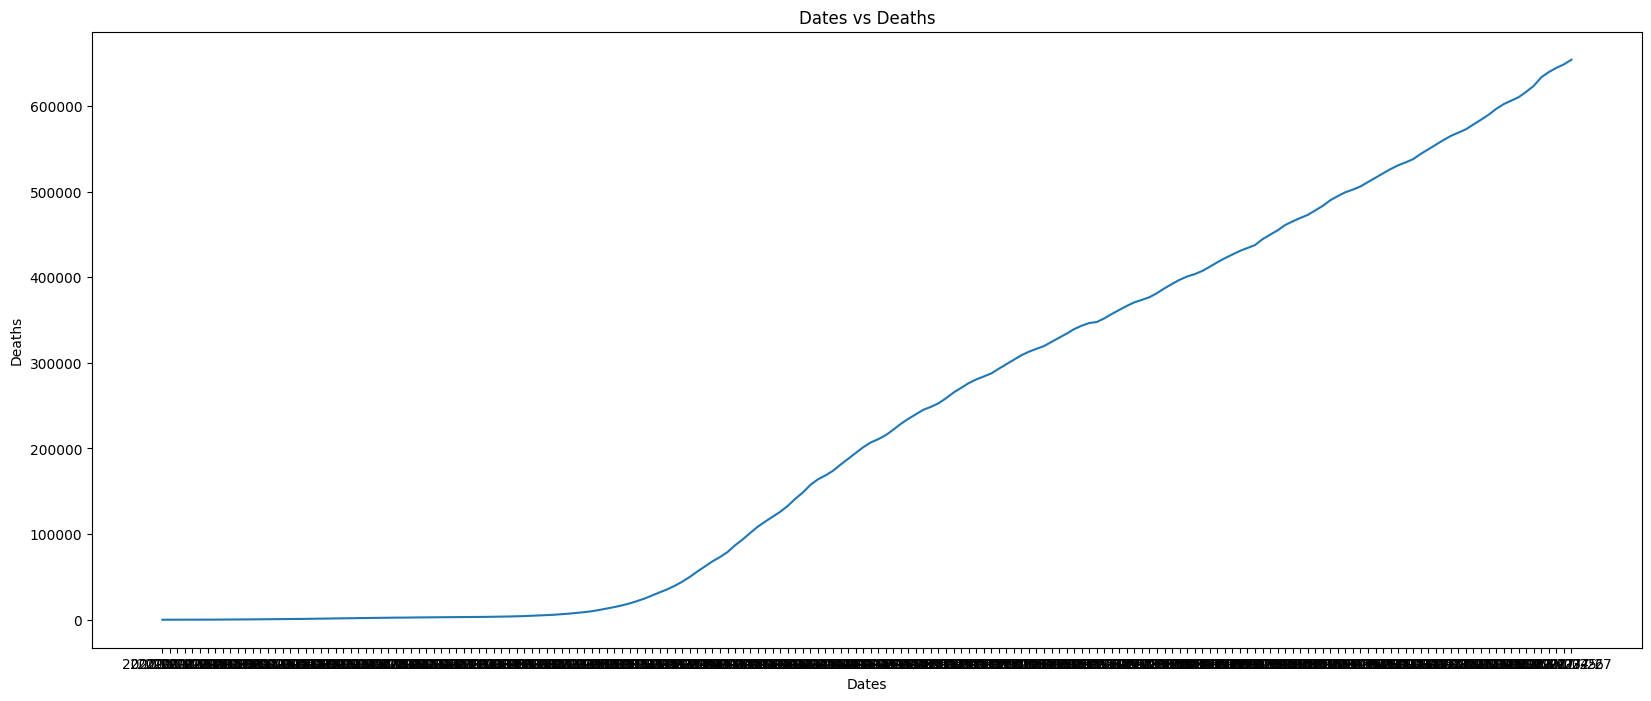

In [181]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_dates,x='Date',y='Deaths')
plt.xlabel('Dates')
plt.ylabel('Deaths')
plt.title('Dates vs Deaths')
plt.show()

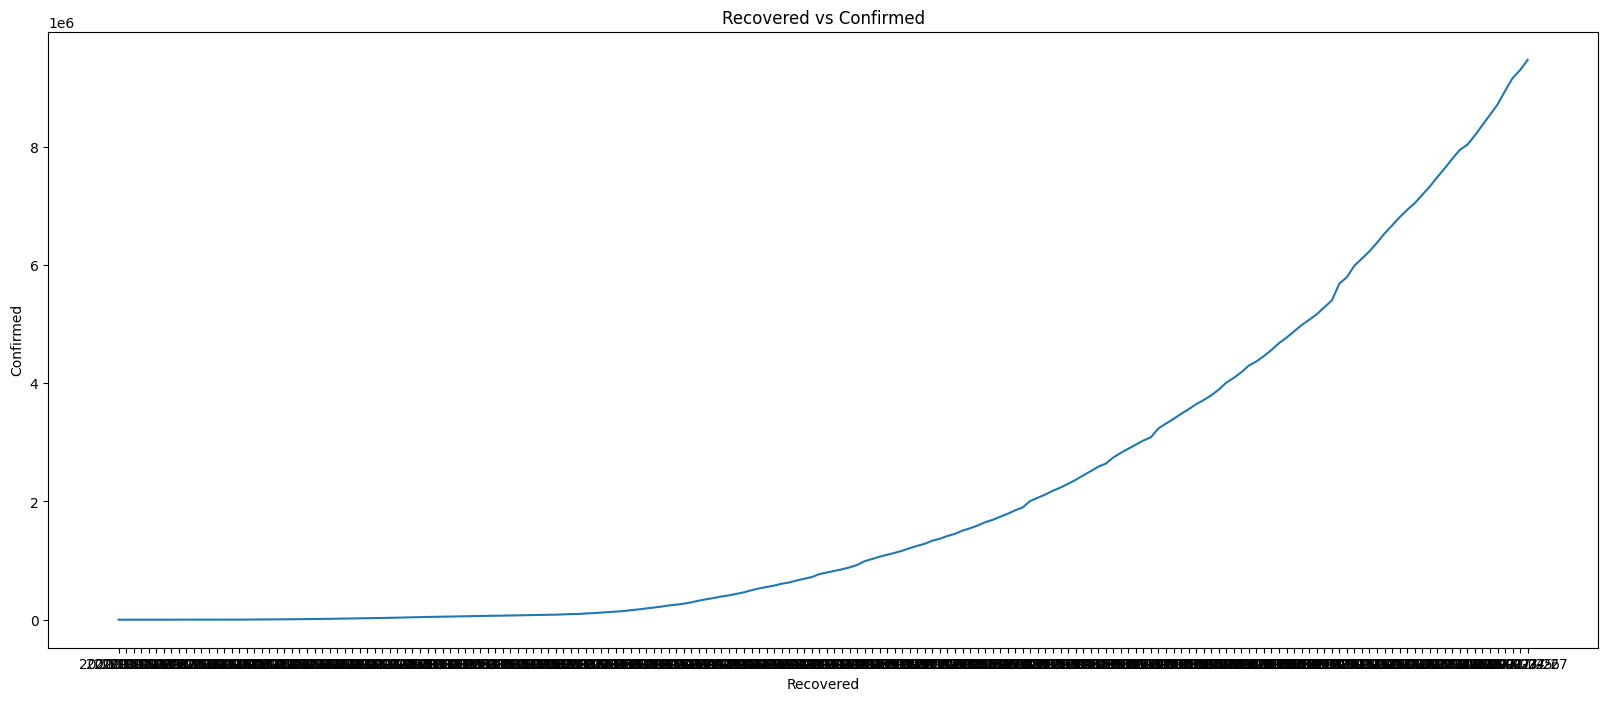

In [182]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_dates,x='Date',y='Recovered')
plt.xlabel('Recovered')
plt.ylabel('Confirmed')
plt.title('Recovered vs Confirmed')
plt.show()

### **Prophet**

In [183]:
# !pip install Prophet

In [184]:
from prophet import Prophet

In [185]:
df_confirmed = df_dates[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [186]:
df_confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


### **Model Building**

In [187]:
model = Prophet()

In [188]:
model.fit(df_confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_qfj47xv/vq4czst_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_qfj47xv/vtlvz3cw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23397', 'data', 'file=/tmp/tmp_qfj47xv/vq4czst_.json', 'init=/tmp/tmp_qfj47xv/vtlvz3cw.json', 'output', 'file=/tmp/tmp_qfj47xv/prophet_model6z087ngt/prophet_model-20250710184109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [189]:
future = model.make_future_dataframe(periods=7)
forecased_data = model.predict(future)

In [190]:
forecased_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.293586e+05,8.188740e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.123058e+05,1.014929e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.029740e+05,1.116958e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.779748e+04,1.153314e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.503826e+04,1.165265e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.664356e+07,1.685082e+07,1.673860e+07,1.675183e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684129e+07,1.705879e+07,1.693672e+07,1.696240e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705492e+07,1.727289e+07,1.713462e+07,1.717361e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725084e+07,1.747918e+07,1.732968e+07,1.738664e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [191]:
forecased_data[['yhat_lower', 'yhat', 'yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.293586e+05,-2.067684e+04,8.188740e+04
1,-1.123058e+05,-8.050948e+03,1.014929e+05
2,-1.029740e+05,5.827455e+03,1.116958e+05
3,-9.779748e+04,1.217668e+04,1.153314e+05
4,-9.503826e+04,8.405020e+03,1.165265e+05
...,...,...,...
190,1.664356e+07,1.674391e+07,1.685082e+07
191,1.684129e+07,1.695910e+07,1.705879e+07
192,1.705492e+07,1.716676e+07,1.727289e+07
193,1.725084e+07,1.736430e+07,1.747918e+07


### **ds:**
This column contains the dates for which the predictions have been made. It stands for "date stamp."

### **yhat:**
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

### **yhat_upper:**
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.

It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

### **yhat_lower:**
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.

### **Forecasted data**

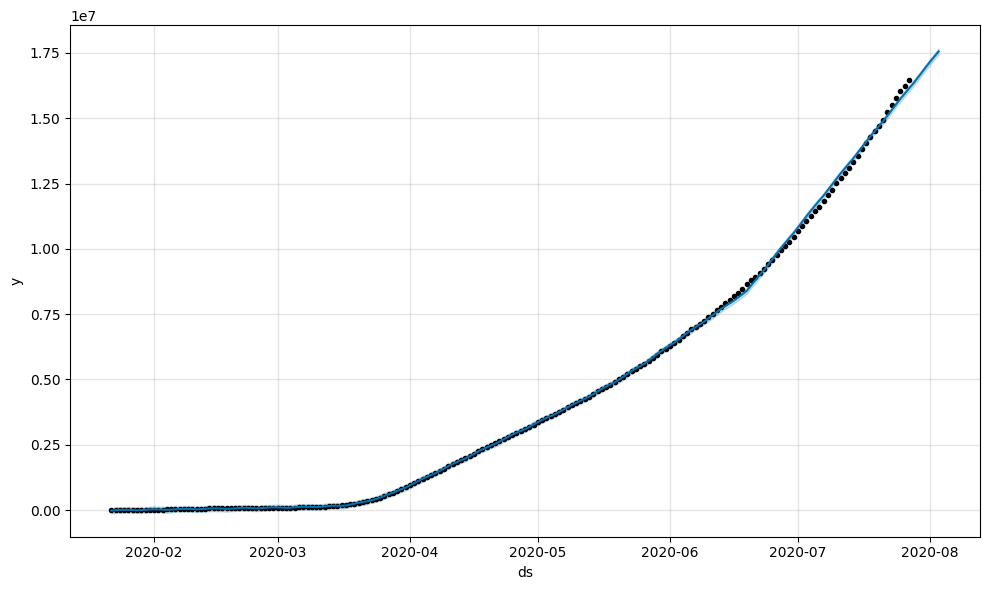

In [192]:
model.plot(forecased_data)
plt.show()

In [193]:
import plotly
import plotly.express as ex

In [194]:
world=df.groupby(['Country'])[['Confirmed'	,'Deaths'	,'Recovered',	'Active'	]].sum().reset_index()
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


### **Plotting the forecasted data on the World map**

In [201]:
figure = ex.choropleth(world, locations='Country', locationmode='country names', color='Active', hover_name='Country',range_color=[1,10000], color_continuous_scale='reds', title='COVID-19 World map')
figure.show()